## Homework week 3

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction import DictVectorizer

### Importing dataset

In [2]:
url = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [3]:
data = pd.read_csv(url)

In [4]:
data.to_csv('car_data.csv', index=False)

In [5]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


### Selecting the columns for the homework

In [6]:
df = data[['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders', 'Transmission Type', 'Vehicle Style', 'highway MPG', 'city mpg', 'MSRP']]

### Data shape exploration

In [7]:
df.shape

(11914, 10)

In [8]:
df.describe(include='all')

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
count,11914,11914,11914.000000,11845.00000,11884.000000,11914,11914,11914.000000,11914.000000,1.191400e+04
unique,48,915,NaN,NaN,NaN,5,16,NaN,NaN,NaN
top,Chevrolet,Silverado 1500,NaN,NaN,NaN,AUTOMATIC,Sedan,NaN,NaN,NaN
freq,1123,156,NaN,NaN,NaN,8266,3048,NaN,NaN,NaN
mean,NaN,NaN,2010.384338,249.38607,5.628829,NaN,NaN,26.637485,19.733255,4.059474e+04
std,NaN,NaN,7.579740,109.19187,1.780559,NaN,NaN,8.863001,8.987798,6.010910e+04
min,NaN,NaN,1990.000000,55.00000,0.000000,NaN,NaN,12.000000,7.000000,2.000000e+03
25%,NaN,NaN,2007.000000,170.00000,4.000000,NaN,NaN,22.000000,16.000000,2.100000e+04
50%,NaN,NaN,2015.000000,227.00000,6.000000,NaN,NaN,26.000000,18.000000,2.999500e+04
75%,NaN,NaN,2016.000000,300.00000,6.000000,NaN,NaN,30.000000,22.000000,4.223125e+04


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine HP          11845 non-null  float64
 4   Engine Cylinders   11884 non-null  float64
 5   Transmission Type  11914 non-null  object 
 6   Vehicle Style      11914 non-null  object 
 7   highway MPG        11914 non-null  int64  
 8   city mpg           11914 non-null  int64  
 9   MSRP               11914 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.9+ KB


### Checking for null values and duplication

In [10]:
df.isnull().sum()

Make                  0
Model                 0
Year                  0
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Vehicle Style         0
highway MPG           0
city mpg              0
MSRP                  0
dtype: int64

In [11]:
df.duplicated().sum()

828

### Data Preparation

In [12]:
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [13]:
for cols in df.describe(exclude='number').columns:
    df[cols] = df[cols].str.lower().str.replace(" ", "_")

/var/folders/tx/jjsn0f4s0013qrtq2z76fw8m0000gn/T/ipykernel_77786/3374994384.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols] = df[cols].str.lower().str.replace(" ", "_")


In [14]:
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,46135
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,40650
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,36350
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,29450
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,34500


#### Filling null values with 0

In [15]:
df = df.fillna(0)

In [16]:
df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

#### Rename MSRP variable to price

In [17]:
df.rename(columns={'msrp': 'price'}, inplace=True)

In [18]:
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,46135
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,40650
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,36350
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,29450
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,34500


#### Making a copy of the dataset for regression question 6

In [19]:
df_reg = df.copy(deep=True)

## Question 1

- What is the most frequent observation (mode) for the column transmission_type?

In [20]:
df.transmission_type.mode()

0    automatic
Name: transmission_type, dtype: object

## Question 2

Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

- What are the two features that have the biggest correlation in this dataset?

In [21]:
corr = df.corr(numeric_only=True)

In [22]:
corr

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg,price
year,1.000000,0.338714,-0.040708,0.258240,0.198171,0.227590
engine_hp,0.338714,1.000000,0.774851,-0.415707,-0.424918,0.650095
engine_cylinders,-0.040708,0.774851,1.000000,-0.614541,-0.587306,0.526274
highway_mpg,0.258240,-0.415707,-0.614541,1.000000,0.886829,-0.160043
city_mpg,0.198171,-0.424918,-0.587306,0.886829,1.000000,-0.157676
price,0.227590,0.650095,0.526274,-0.160043,-0.157676,1.000000


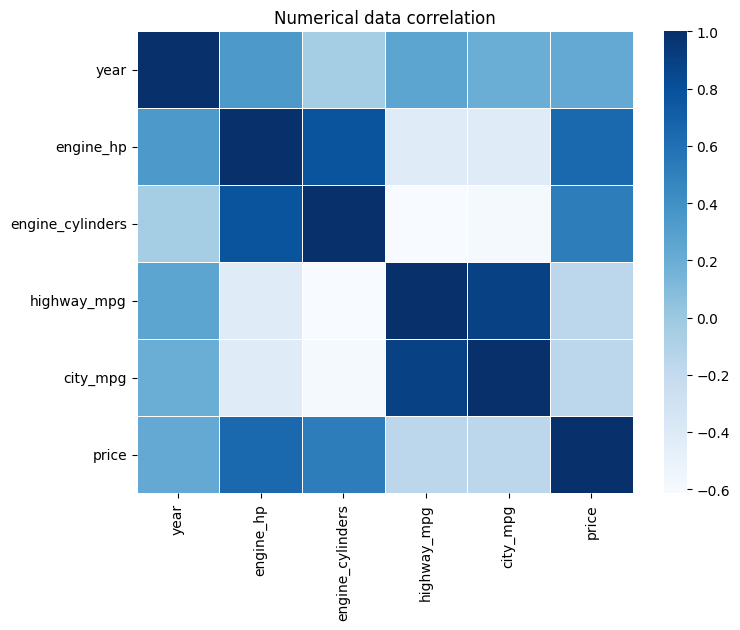

In [23]:
plt.figure(figsize=(8,6))  
sns.heatmap(corr,linewidths=.5, cmap="Blues")
plt.title('Numerical data correlation')
plt.show()

In [24]:
# Inspecting the correlation:
corr.unstack().sort_values(ascending = False)[6:16]

city_mpg          highway_mpg         0.886829
highway_mpg       city_mpg            0.886829
engine_hp         engine_cylinders    0.774851
engine_cylinders  engine_hp           0.774851
price             engine_hp           0.650095
engine_hp         price               0.650095
engine_cylinders  price               0.526274
price             engine_cylinders    0.526274
engine_hp         year                0.338714
year              engine_hp           0.338714
dtype: float64

#### Answer
- highway_mpg and city_mpg

### Make price binary

- Now we need to turn the price variable from numeric into a binary format.
- Let's create a variable above_average which is 1 if the price is above its mean value and 0 otherwise.


In [25]:
mean_price = df.price.mean()
mean_price

40594.737032063116

In [26]:
df['above_average'] = df.price.apply(lambda x: 1 if x > mean_price else 0)

In [27]:
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,46135,1
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,40650,1
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,36350,0
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,29450,0
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,34500,0


#### Split the data

- Split your data in train/val/test sets with 60%/20%/20% distribution.
- Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
- Make sure that the target value (price) is not in your dataframe.

In [28]:
df.drop(columns='price', inplace=True)

In [29]:
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,1
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,1
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,0
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,0
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,0


#### Dividing the data in train, val, and test

In [31]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [32]:
# Reset index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [33]:
X_train = df_train.iloc[:, :-1]
X_val = df_val.iloc[:, :-1]
X_test = df_test.iloc[:, :-1]

In [34]:
y_train = df_train.above_average
y_val = df_val.above_average
y_test = df_test.above_average

In [35]:
print(X_train.shape)
X_train.head(3)

(7148, 9)


,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg
0,mitsubishi,endeavor,2011,225.0,6.0,automatic,4dr_suv,19,15
1,kia,borrego,2009,276.0,6.0,automatic,4dr_suv,21,17
2,lamborghini,gallardo,2012,570.0,10.0,manual,convertible,20,12


In [36]:
print(X_val.shape)
X_val.head(3)

(2383, 9)


,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg
0,volkswagen,beetle,2015,210.0,4.0,manual,2dr_hatchback,31,23
1,audi,sq5,2015,354.0,6.0,automatic,4dr_suv,24,17
2,pontiac,grand_am,2005,140.0,4.0,automatic,sedan,31,22


In [37]:
print(X_test.shape)
X_test.head(3)

(2383, 9)


,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg
0,gmc,envoy_xl,2005,275.0,6.0,automatic,4dr_suv,18,13
1,volkswagen,passat,2016,170.0,4.0,automatic,sedan,38,25
2,honda,odyssey,2016,248.0,6.0,automatic,passenger_minivan,28,19


In [38]:
print(y_train.shape, y_val.shape, y_test.shape)

(7148,) (2383,) (2383,)


### Question 3

- Calculate the mutual information score between above_average and other categorical variables in our dataset. Use the training set only.
- Round the scores to 2 decimals using round(score, 2).
<br />
Which of these variables has the lowest mutual information score?

In [39]:
# importing library
from sklearn.metrics import mutual_info_score

In [40]:
# Function for mutual informatin score
def calculate_mi(series):
    return mutual_info_score(series, df_train.above_average)

In [41]:
cat_cols = df_train.describe(exclude='number').columns
cat_cols

Index(['make', 'model', 'transmission_type', 'vehicle_style'], dtype='object')

In [42]:
df_mi = df_train[cat_cols].apply(calculate_mi)

In [45]:
df_mi.sort_values()

transmission_type    0.020958
vehicle_style        0.084143
make                 0.239769
model                0.462344
dtype: float64

- **Anwser** -> transmission_type

### Question 4

- Now let's train a logistic regression.
- Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
- Fit the model on the training dataset.
- To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
- Calculate the accuracy on the validation dataset and round it to 2 decimal digits.\
######
What accuracy did you get?

#### One-Hot

In [46]:
dv = DictVectorizer(sparse=False)

train_dict = X_train.to_dict(orient='records')
X_train_oh = dv.fit_transform(train_dict)

val_dict = X_val.to_dict(orient='records')
X_val_oh = dv.transform(val_dict)

### Making Log model

In [47]:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)

In [48]:
model.fit(X_train_oh, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [49]:
y_pred = model.predict(X_val_oh)

In [50]:
accuracy = np.round(accuracy_score(y_val, y_pred),2)
print(accuracy)

0.95


In [52]:
# dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

##

### Question 5

- Let's find the least useful feature using the feature elimination technique.
- Train a model with all these features (using the same parameters as in Q4).
- Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
- For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

In [53]:
all_cols = list(X_train.columns)
print(all_cols)

['make', 'model', 'year', 'engine_hp', 'engine_cylinders', 'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg']


In [55]:
# Check accuracy value
accuracy

0.95

In [56]:
result_q5 = []

for col in all_cols:
    subset = all_cols.copy()
    subset.remove(col)
    
    train_dict = X_train[subset].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)

    X_train_oh_new = dv.transform(train_dict)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train_oh_new, y_train)

    val_dict = X_val[subset].to_dict(orient='records')
    X_val_oh_new = dv.transform(val_dict)

    y_pred_new = model.predict(X_val_oh_new)

    score = accuracy_score(y_val, y_pred_new)
    result_q5.append((col, accuracy, accuracy - score, score))

In [58]:
df_q5_result = pd.DataFrame(result_q5, columns=['Feature', 'ori_accuracy', 'diff', 'accuracy_menos_1'])
df_q5_result.sort_values('diff')

,Feature,ori_accuracy,diff,accuracy_menos_1
2,year,0.95,0.002455,0.947545
8,city_mpg,0.95,0.003294,0.946706
5,transmission_type,0.95,0.004133,0.945867
7,highway_mpg,0.95,0.010848,0.939152
0,make,0.95,0.011267,0.938733
4,engine_cylinders,0.95,0.012526,0.937474
6,vehicle_style,0.95,0.014205,0.935795
3,engine_hp,0.95,0.028892,0.921108
1,model,0.95,0.029312,0.920688


###

### Question 6

- For this question, we'll see how to use a linear regression model from Scikit-Learn.
- We'll need to use the original column price. Apply the logarithmic transformation to this column.
- Fit the Ridge regression model on the training data with a solver 'sag'. Set the seed to 42.
- This model also has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10].
- Round your RMSE scores to 3 decimal digits.

In [59]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [60]:
df_reg.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,46135
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,40650
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,36350
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,29450
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,34500


In [61]:
df_reg.price = np.log1p(df_reg.price)

In [62]:
df_reg.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,10.739349
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,10.612779
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,10.500977
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,10.290483
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,10.448744


#### Divide de dataset in train, val, and test

In [63]:
df_train_full_reg, df_test_reg = train_test_split(df_reg, test_size=0.2, random_state=42)
df_train_reg, df_val_reg = train_test_split(df_train_full_reg, test_size=0.25, random_state=42)

# Reset index
df_train_reg = df_train_reg.reset_index(drop=True)
df_val_reg = df_val_reg.reset_index(drop=True)
df_test_reg = df_test_reg.reset_index(drop=True)

In [65]:
X_train_reg = df_train_reg.iloc[:, :-1]
X_val_reg = df_val_reg.iloc[:, :-1]
X_test_reg = df_test.iloc[:, :-1]

y_train_reg = df_train_reg.price
y_val_reg = df_val_reg.price
y_test_reg = df_test_reg.price

#### Preparing the dataset

In [66]:
train_dict_reg = df_train_reg.to_dict(orient='records')

#### One-hot for regression

In [67]:
dv_reg = DictVectorizer(sparse=False)
dv_reg.fit(train_dict_reg)

X_train_reg = dv.transform(train_dict_reg)

val_dict_reg = df_val_reg.to_dict(orient='records')
X_val_reg = dv.transform(val_dict_reg)

#### Alpha values list

In [68]:
alpha_list = [0, 0.01, 0.1, 1, 10]

### Running Ridge regession

In [69]:
for a in alpha_list:
    ridge_model =  Ridge(alpha=a, solver="sag", random_state=42)

    ridge_model.fit(X_train_reg, y_train_reg)
    ridge_pred = ridge_model.predict(X_val_reg)

    score = np.sqrt(mean_squared_error(y_val_reg, ridge_pred))

    print(f'Alpha -> {a} and Score -> {np.round(score, 3)}')

/Users/dashelruizperez/PycharmProjects/mlzoomcamp-week-3/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Alpha -> 0 and Score -> 0.49


/Users/dashelruizperez/PycharmProjects/mlzoomcamp-week-3/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Alpha -> 0.01 and Score -> 0.49


/Users/dashelruizperez/PycharmProjects/mlzoomcamp-week-3/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Alpha -> 0.1 and Score -> 0.49


/Users/dashelruizperez/PycharmProjects/mlzoomcamp-week-3/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Alpha -> 1 and Score -> 0.49
Alpha -> 10 and Score -> 0.49


/Users/dashelruizperez/PycharmProjects/mlzoomcamp-week-3/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
